In [56]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [57]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [58]:
train_input.shape

(60000, 28, 28)

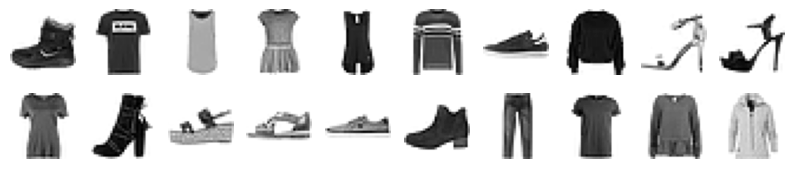

In [59]:
fig,axs= plt.subplots(2,10,figsize=(10,2))
for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_input[10*i+j],cmap='gray_r')
        axs[i,j].axis('off')
        
plt.show()

In [60]:
# 합성곱 신경망은 3차원 행렬이 되어야 함.
train_scaled = train_input.reshape(-1,28,28,1)/255.0

In [61]:
train_scaled.shape

(60000, 28, 28, 1)

In [62]:
# train세트 - train세트,검증세트,test세트
# 표준화작업
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [63]:
# 딥러닝 훈련 - 인공신경망(ANN)
# 데이터 전처리 train_scaled = train_input.reshape(-1,28,28,1)/255.0 

# 모델결정 model = keras.Sequential()

# 합성곱 신경망(CNN)
# 1차 합성곱 신경망
# model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),input_shape=(28,28,1))
# 최대 풀링 model.add(keras.layers.MaxPooling2D(2))

# 2차 합성곱 신경망
# model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',))
# model.add(keras.layers.MaxPooling2D(2))

# 인공신경망 훈련
# Flatten 추가 model.add(keras.layers.Flatten())
# Dense층 추가 model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃 추가 model.add(keras.layers.Dropout(0.4)) # 30%를 제외시키는 규제 적용
# Dense층 추가 model.add(keras.layers.Dense(10,activation='softmax'))

# model.summary()

# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델 체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 조기 종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                   validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early,stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

# test 세트 검증 - 3차원행렬로 변경해서 test 진행해야함.
# test_scaled = test_input.reshape(-1,28,28,1)/255.0
# model.evaluate(test_scaled,test_target)

1차 합성곱 층을 생성 

In [64]:
# 1차 합성곱 신경망
model = keras.Sequential()
# padding='same', 'valid': 패딩 사용하지 않음.
# input_shape=(28,28,1) , 사이즈 28x28 그레이 색상 1, (28,28,3) - 사이즈 28,28,RGB색상 3개
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',
          input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2차 합성곱 층을 생성 

In [65]:
# 2차 합성곱 신경망
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',))
model.add(keras.layers.MaxPooling2D(2))

In [66]:
model.add(keras.layers.Flatten())   # 1차원행렬
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [67]:
model.summary()

# conv2d param 사이즈: kernel_size(3,3) x 깊이(1) x 필터(32개) - 3 x 3 x 1 x 32 + 32 = 320
# MaxPooling2D => 사이즈가 절반으로 변경
# flatten: 1차원 행렬 14*14*32=6272

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# keras.utils.plot_model(model)

In [69]:
# keras.utils.plot_model(model,show_shapes=True, to_file='cnn_a.png',dpi=300)

In [70]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [71]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7374 - loss: 0.7252 - val_accuracy: 0.8788 - val_loss: 0.3262
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8746 - loss: 0.3497 - val_accuracy: 0.9022 - val_loss: 0.2700
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8943 - loss: 0.2924 - val_accuracy: 0.9055 - val_loss: 0.2514
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9071 - loss: 0.2603 - val_accuracy: 0.9137 - val_loss: 0.2335
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9126 - loss: 0.2370 - val_accuracy: 0.9062 - val_loss: 0.2494
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9225 - loss: 0.2143 - val_accuracy: 0.9170 - val_loss: 0.2280
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9264 - loss: 0.2014 - val_accuracy: 0.9207 - val_loss: 0.2196
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9332 - loss: 0

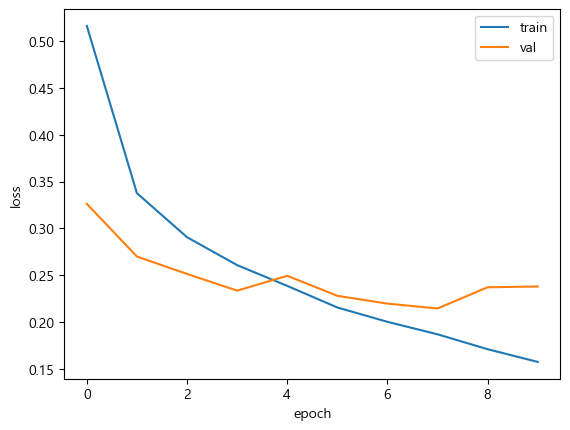

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [74]:
early_stopping_cb.stopped_epoch

9

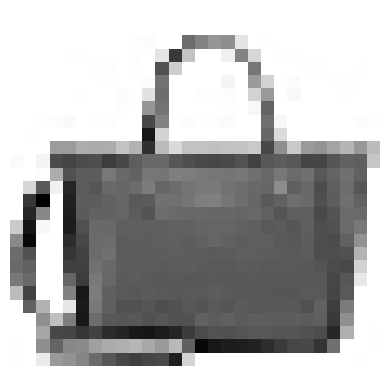

In [79]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.axis('off')
plt.show()

In [77]:
predict = model.predict(val_scaled[0:1]) # 3차원 행렬형태
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[1.4797654e-16 1.3081772e-23 6.7295343e-22 4.7442485e-18 1.0465273e-18
  2.3413901e-18 1.4548799e-16 1.9259865e-21 1.0000000e+00 1.1101563e-21]]


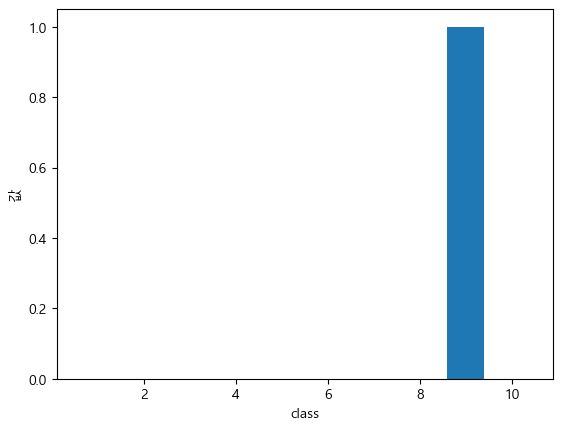

In [78]:
plt.bar(range(1,11),predict[0])
plt.xlabel('class')
plt.ylabel('값')
plt.show()

In [80]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵글부츠']

In [81]:
print(classes[np.argmax(predict)])  # np.argmax 최대값의 index값을 리턴

가방


In [82]:
# test 세트 검증 - 3차원행렬로 변경해서 test 진행해야함.
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [83]:
test_scaled.shape

(10000, 28, 28, 1)

In [85]:
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9159 - loss: 0.2410


[0.234405517578125, 0.9160000085830688]